Step 1

In [13]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt

boston = load_boston()
x_data = boston.data
y_data = boston.target
name_data = boston.feature_names
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)
y_train=y_train.astype('int')
y_test=y_test.astype('int')

Step 2

In [14]:
dtc=DecisionTreeClassifier()
dtc=dtc.fit(x_train,y_train)
dtc_y_predict=dtc.predict(x_test)

Step 3

In [15]:
Td=dtc.get_depth()
print("Tree depth:",Td)
print("Num of leaves:",dtc.get_n_leaves())
print("Feature importance:",dtc.feature_importances_)
print("Train score:",dtc.score(x_train,y_train))
print("Test score:",dtc.score(x_test,y_test))

Tree depth: 16
Num of leaves: 212
Feature importance: [0.08121993 0.01649964 0.03492205 0.0081849  0.05223804 0.17833932
 0.1109939  0.11653176 0.02495075 0.02201792 0.0867915  0.0983384
 0.16897189]
Train score: 1.0
Test score: 0.1118421052631579


Step 4

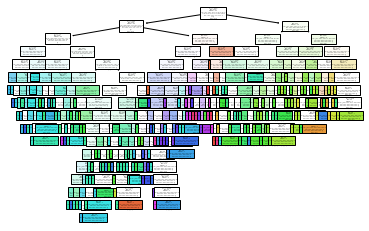

In [16]:
plt.figure()
plot_tree(dtc,feature_names=y_data,class_names=True,filled=True)
plt.show()

Step 5&6

In [17]:
ts_high=0
dtc_high=dtc.fit(x_train,y_train)
for depth in range(1,Td):
    dtc = DecisionTreeClassifier(max_depth=depth)
    dtc = dtc.fit(x_train, y_train)
    dtc_y_predict = dtc.predict(x_test)
    print("Tree depth:", depth)
    print("Num of leaves:", dtc.get_n_leaves())
    print("Feature importance:", dtc.feature_importances_)
    print("Train score:", dtc.score(x_train, y_train))
    print("Test score:", dtc.score(x_test, y_test))
    if ts_high < dtc.score(x_test, y_test):
        ts_high=dtc.score(x_test, y_test)
        dtc_high=dtc

Tree depth: 1
Num of leaves: 2
Feature importance: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Train score: 0.11864406779661017
Test score: 0.09868421052631579
Tree depth: 2
Num of leaves: 4
Feature importance: [0.16769637 0.         0.         0.         0.         0.38854089
 0.         0.         0.         0.         0.         0.
 0.44376273]
Train score: 0.1553672316384181
Test score: 0.09868421052631579
Tree depth: 3
Num of leaves: 8
Feature importance: [0.24328957 0.         0.         0.         0.         0.38001023
 0.         0.         0.         0.         0.         0.
 0.3767002 ]
Train score: 0.2062146892655367
Test score: 0.14473684210526316
Tree depth: 4
Num of leaves: 16
Feature importance: [0.14452064 0.         0.         0.         0.         0.3202346
 0.         0.10070509 0.         0.06000593 0.11528403 0.
 0.25924971]
Train score: 0.2824858757062147
Test score: 0.11842105263157894
Tree depth: 5
Num of leaves: 31
Feature importance: [0.12159521 0.03205957 0.0239

Step 7

The output of highest test score with depth 13


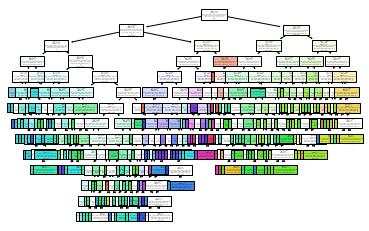

In [18]:
print("The output of highest test score with depth",dtc_high.get_depth())
plt.figure()
plot_tree(dtc_high,feature_names=y_data,class_names=True,filled=True)
plt.show()